## Dataset Description

### Dataset Overview

The dataset used for this research, "Retail Store Sales - Dirty for Data Cleaning", simulates a point-of-sale transaction in a retail store. Specifically, it was made for practicing data analysis and cleaning. Several weaknesses that are frequently present in real-world business datasets, including missing values, inconsistent formats, and potential duplication, are included in the data, which is constructed to reflect actual retail transactions. 

### Data Source and Collection

This dataset is publicly available on Kaggle, created by Ahmed Mohammed. It was formulated to represent the real world complex nature of transactional sales records observed in retail settings. For instructional and analytical reasons, the dataset is structured to mimic realistic scenarios, even if it is not based on the records of a real business.

### Potential Implications of Data Collection

The dataset is simulated, thus it is free of the sampling biases and privacy issues that are usually present in real-world data.  But before any substantial analysis can occur, its purposeful roughness motivates students to use the proper data cleaning techniques.  The difficulties this dataset poses are reflective of real data management issues that arise in real life, even if the insights it offers might not be directly applicable to actual businesses.

### Structure of Data

The dataset is presented in a tabular format, where: 

- Rows represents a unique sales transaction
- Columns represents an important attribute of the transaction (e.g., item, quantity, payment method, etc.)
- The dataset contains 12,575 observations.

### Attribute Description

- Transaction ID - A unique identifier for each transaction. 
- Customer ID - A unique identifier for each costumer. 
- Category - The category of the purchased item. 
- Item - The name of the purchased item. 
- Price Per Unit - The statistic price of a single unit of the item. 
- Quantity - The quantity of the item purchased. 
- Total Spent - The total amount spent on the transaction. 
- Payment Method - The method of payment used. 
- Location - The location where the transaction occured. 
- Transaction Date - The date of the transaction. 
- Discount Applied - Whether discount is applied or not. 

## Data Cleaning

Before any Exploratory Data Analysis can be done to answer our research questions with the dataset, we have to clean the data first in case there are any issues that may result in problems with the analysis.

### Importing, Loading and Reading the Dataset

We begin by importing all the necessary libraries before starting the actual Data Cleaning process.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl

Next, we load the dataset and call the `.head()` function to view a snippet of the dataset's contents.

In [4]:
df = pd.read_csv('retail_store_sales.csv')
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


Then the `.info()` function to view general information about the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


This tells us that the dataset contains 12575 entries, but more importantly, we can quickly identify (3) potential issues we'll need to resolve as we go through the Data Cleaning process:

1. The `Discount Applied` column uses a Dtype of `object` rather than `boolean`.

2. The `Transaction Date` column uses a Dtype of `object` rather than `datetime64[ns]`. But since it also contains day, month, and year in one column, we can split these into their own respective Dtype `int64` columns.

3. The columns `Item`, `Price Per Unit`, `Quantity`, `Total Spent`, and `Discount Applied` all contain null values. Thus, we'll need to look into any inconsistencies or issues with these columns.

But before investigating these specific dataset issues, we'll start off with some preliminary checks by looking for duplicate values and duplicate categorical representations.

### Duplicate Values

In [6]:
df.duplicated().sum()

np.int64(0)

This dataset contains no duplicate values, so **no issues** there.

### Multiple Representations of the Same Categorical Value

The columns to watch out for here are `Category`, `Payment Method`, and `Location`. We have to ensure none of their representations end up being the same as other ones.

We'll start with `Category`.

In [7]:
df['Category'].unique()

array(['Patisserie', 'Milk Products', 'Butchers', 'Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories'], dtype=object)

Next, `Payment Method`.

In [8]:
df['Payment Method'].unique()

array(['Digital Wallet', 'Credit Card', 'Cash'], dtype=object)

Lastly, `Location`.

In [9]:
df['Location'].unique()

array(['Online', 'In-store'], dtype=object)

Since none of the categories were representing the same thing as other categories, there are **no issues** to be found here.

### Incorrect Datatypes

For this portion, we'll resolve each of the previously mentioned columns individually.

#### Transaction Date Column

In order to make extracting the date into three separate columns easier, we'll first turn the `Transaction Date` into Dtype `datetime64[ns]` rather than its current Dtype of `object`. 

In [10]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11966 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  8376 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


Afterwards, we may use `.dt.year`, `.dt.month`, and `.dt.day` to extract each part of the date and put them into their own separate columns.

In [11]:
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Day'] = df['Transaction Date'].dt.day
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month,Day
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,2024,4,8
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,2023,7,23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,2022,10,5
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN,2022,5,7
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,2022,10,2


Now that we've created columns `Year`, `Month`, and `Day` we no longer need the `Transaction Date` column, so we'll drop it.

In [12]:
df = df.drop(columns = 'Transaction Date')
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied,Year,Month,Day
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,True,2024,4,8
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,True,2023,7,23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,False,2022,10,5
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,NaN,2022,5,7
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,False,2022,10,2


#### Discount Applied Column

To turn the `Discount Applied` column's Dtype into `boolean` rather than its current Dtype of `object`, we'll use `.astype('boolean')`. 

In [13]:
df['Discount Applied'] = df['Discount Applied'].astype('boolean')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Discount Applied  8376 non-null   boolean
 10  Year              12575 non-null  int32  
 11  Month             12575 non-null  int32  
 12  Day               12575 non-null  int32  
dtypes: boolean(1), float64(3), int32(3), object(6)
memory usage: 1.0+ MB


Confirm the values using `.head()`.

In [14]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied,Year,Month,Day
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,True,2024,4,8
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,True,2023,7,23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,False,2022,10,5
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,<NA>,2022,5,7
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,False,2022,10,2


### Missing Data

For this portion, we'll resolve each of the previously mentioned columns individually.

#### Item Column

One simple solution would be to drop all rows containing null values in the Item column. However, let's take a quick glance at the `Category` and `Item` columns.

In [15]:
df[['Category', 'Item']].head(8)

,Category,Item
0,Patisserie,Item_10_PAT
1,Milk Products,Item_17_MILK
2,Butchers,Item_12_BUT
3,Beverages,Item_16_BEV
4,Food,Item_6_FOOD
5,Patisserie,NaN
6,Food,Item_1_FOOD
7,Furniture,NaN


Each item has the pattern `Item_##_CATEGORYID` with the category identifier being based on the value in `Category`. So while we can't figure out what item number was chosen, we can still figure out the category identifier for each item. After all, the `Category` column contains 0 null values.

So rather than dropping the null values for `Item` and losing potentially precious data, we can instead fill up all the rows for `Item` using only the category identifier.

We'll first create a dictionary of key-value pairs, with the content of `Category` serving as our key and the category identifier as the value.

In [16]:
category_id = {'Patisserie':'Item_NA_PAT', 'Milk Products':'Item_NA_MILK', 'Butchers':'Item_NA_BUT', 'Beverages':'Item_NA_BEV',
               'Food':'Item_NA_FOOD', 'Furniture':'Item_NA_FUR', 'Electric household essentials':'Item_NA_EHE',
               'Computers and electric accessories':'Item_NA_CEA'}
category_id

{'Patisserie': 'Item_NA_PAT',
 'Milk Products': 'Item_NA_MILK',
 'Butchers': 'Item_NA_BUT',
 'Beverages': 'Item_NA_BEV',
 'Food': 'Item_NA_FOOD',
 'Furniture': 'Item_NA_FUR',
 'Electric household essentials': 'Item_NA_EHE',
 'Computers and electric accessories': 'Item_NA_CEA'}

In [17]:
df['Item'] = df['Item'].fillna(df['Category'].map(category_id))
df[['Category', 'Item']].head(8)

,Category,Item
0,Patisserie,Item_10_PAT
1,Milk Products,Item_17_MILK
2,Butchers,Item_12_BUT
3,Beverages,Item_16_BEV
4,Food,Item_6_FOOD
5,Patisserie,Item_NA_PAT
6,Food,Item_1_FOOD
7,Furniture,Item_NA_FUR


And if we run `.info()` on our dataset, `Item` should no longer contain any null values.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              12575 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Discount Applied  8376 non-null   boolean
 10  Year              12575 non-null  int32  
 11  Month             12575 non-null  int32  
 12  Day               12575 non-null  int32  
dtypes: boolean(1), float64(3), int32(3), object(6)
memory usage: 1.0+ MB


#### Price Per Unit Column

Filling up the null values for `Price Per Unit` is doable as long as both `Quantity` and `Total Spent` contain values. All we have to do is compute what the price per unit would be based on the quantity and total spent.

In [19]:
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Total Spent']/df['Quantity'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              12575 non-null  object 
 4   Price Per Unit    12575 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Discount Applied  8376 non-null   boolean
 10  Year              12575 non-null  int32  
 11  Month             12575 non-null  int32  
 12  Day               12575 non-null  int32  
dtypes: boolean(1), float64(3), int32(3), object(6)
memory usage: 1.0+ MB


#### Quantity and Total Spent Columns

Suspiciously enough, both `Quanity` and `Total Spent` contain the same number of null values. We'll investigate them first to see if they both share null values.

In [20]:
(df['Quantity'].isna() == df['Total Spent'].isna()).all()

np.True_

While we were able to fill up `Price Per Unit` using `Quantity` and `Total Spent` as reference, the opposite doesn't hold true. Since we can't fill these missing values, we'll delete all rows containing null values in both columns

In [21]:
df.dropna(subset = ['Quantity', 'Total Spent'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11971 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    11971 non-null  object 
 1   Customer ID       11971 non-null  object 
 2   Category          11971 non-null  object 
 3   Item              11971 non-null  object 
 4   Price Per Unit    11971 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    11971 non-null  object 
 8   Location          11971 non-null  object 
 9   Discount Applied  7983 non-null   boolean
 10  Year              11971 non-null  int32  
 11  Month             11971 non-null  int32  
 12  Day               11971 non-null  int32  
dtypes: boolean(1), float64(3), int32(3), object(6)
memory usage: 1.1+ MB


#### Discount Applied Column

Removing the null values in `Discount Applied` would be a huge loss in data, considering how many rows would be removed.

In [22]:
# All columns have the same number of non-null values except for Discount Applied
df['Item'].count() - df['Discount Applied'].count()

np.int64(3988)

As you can see, we would lose `3988` rows of data. Instead of dropping the rows with null values, let's instead calculate for the mode. We use mode here over mean and median because the `Discount Applied` column contains categorical data.

In [23]:
df['Discount Applied'] = df['Discount Applied'].fillna(df['Discount Applied'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11971 entries, 0 to 12574
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    11971 non-null  object 
 1   Customer ID       11971 non-null  object 
 2   Category          11971 non-null  object 
 3   Item              11971 non-null  object 
 4   Price Per Unit    11971 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    11971 non-null  object 
 8   Location          11971 non-null  object 
 9   Discount Applied  11971 non-null  boolean
 10  Year              11971 non-null  int32  
 11  Month             11971 non-null  int32  
 12  Day               11971 non-null  int32  
dtypes: boolean(1), float64(3), int32(3), object(6)
memory usage: 1.1+ MB


### Inconsistent Formatting

In [24]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied,Year,Month,Day
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,True,2024,4,8
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,True,2023,7,23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,False,2022,10,5
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,True,2022,5,7
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,False,2022,10,2


Columns `Transaction ID`, `Customer ID`, and `Item` all follow a specific formatting. Let's make sure there are 0 inconsistencies and that this format is followed throughout the entire dataset by using regex.

In [25]:
# Starts with TXN_ and ends with 7 digits
txn_regex = r"^TXN_\d{7}$"
invalid_txn = df[~df['Transaction ID'].str.match(txn_regex)]

invalid_txn.empty

True

In [26]:
# Starts with CUST_ and ends with 2 digits
cust_regex = r"^CUST_\d{2}$"
invalid_cust = df[~df['Customer ID'].str.match(cust_regex)]

invalid_cust.empty

True

In [27]:
# Starts with Item_, then 1 or 2 letters/digits, and ends with 3 or 4 letters
item_regex = r"^Item_\w{1,2}_[A-Z]{3,4}$"
invalid_item = df[~df['Item'].str.match(item_regex)]

invalid_item.empty

True

There are zero inconsistencies with the formatting, so **no issues** here.

## Research Question & Exploratory Data Analysis

### The Research Question

Now that the data has been sufficiently clean, it is ready for the Exploratory Data Analysis (EDA). However, before beginning it is important to decide on a research question that will govern how the EDA is carried out. For this study, the research question is: <b> When are customers willing to make bulk purchases? </b>. To answer this, we will be looking for the variables that correlate with high amounts of items bought

### Exploratory Data Analysis

To begin with, let us first find the summary statistics of the quantity of items per purchase. This is important because we need to know values like the average number of orders so we can find patterns between orders that exceed this average.


Let us first find the mean of the quantity column:

In [28]:
print('{:.2f}'.format(df['Quantity'].mean()))

5.54


Now, let us look for the median of the same column: 

In [29]:
print(df['Quantity'].median())

6.0


Finally, we will take a look at the mode of the quantity column

In [30]:
print(df['Quantity'].mode())

0    10.0
Name: Quantity, dtype: float64


Using the mean and the median, we can see that the average number of orders made is around 5-6. One concern is that the mode of of the column is much higher than the mean and median of the column. This calls into question the distribution of the graph which we can verify in a few different ways:

the first is finding the standard distribution of the specific variable:

In [31]:
print('{:.2f}'.format(df['Quantity'].std()))

2.86


the second method we can use is visualizing the distribution of the variable using a histogram. We are using this kind of graph because it is easy to visualize the spread of data by binning numerous observations into groups based on the quantity of each purchase.

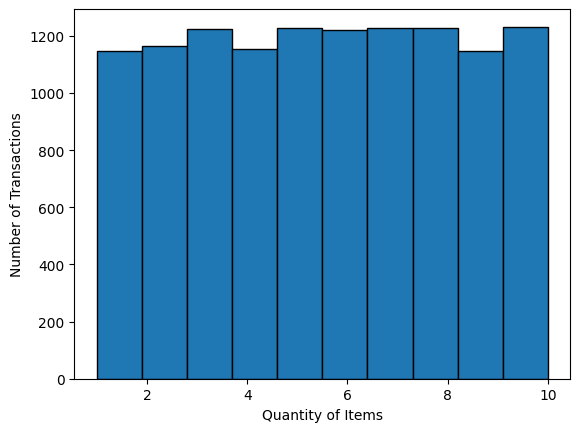

In [32]:

mpl.hist(df['Quantity'], edgecolor = 'black')
mpl.xlabel('Quantity of Items')
mpl.ylabel('Number of Transactions')
mpl.show()

Given this graph, we can see that the data is unimodal (10) with a slight negative skew. This means that a very slight majority of the observations are bunched on the right side of the graph. However, as can be told with the standard deviation and mean, most of the observations are clumped in the 4-7 range. 

For the purpose of this research, we will be considering purchases with 6 or above as bulk purchases as these are all purchases that are above the average quantity of items per purchase. Let us first begin by limiting the database to observations with a quantity of 6 or above.

In [33]:
df_filtered = df[df['Quantity'] >= 6]

Let's take a look at the head of the dataset and do some measures of the central tendancy and spread of the quantity column.

In [34]:
df.head(10)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Discount Applied,Year,Month,Day
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,True,2024,4,8
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,True,2023,7,23
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,False,2022,10,5
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,True,2022,5,7
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,False,2022,10,2
5,TXN_7482416,CUST_09,Patisserie,Item_NA_PAT,20.0,10.0,200.0,Credit Card,Online,True,2023,11,30
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,True,2023,6,10
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,False,2023,4,26
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,False,2024,3,14
10,TXN_8776416,CUST_22,Butchers,Item_3_BUT,8.0,9.0,72.0,Cash,In-store,True,2024,12,14


In [35]:
print('{:.2f}'.format(df_filtered['Quantity'].mean()))

7.99


In [36]:
print(df_filtered['Quantity'].mode())

0    10.0
Name: Quantity, dtype: float64


In [37]:
print('{:.2f}'.format(df_filtered['Quantity'].median()))

8.00


In [38]:
print('{:.2f}'.format(df_filtered['Quantity'].std()))

1.42


Now that we have a better idea of the basic measurements of the quantity column, let's look at the first EDA question

### Question 1: Is there a relationship between the Quantity of Items and the Price per Unit?

Let us first do an analysis of the price per unit column in this filtered dataset, we can easily visualize the distribution of the data using a boxplot

<Axes: title={'center': 'Price Per Unit'}, xlabel='Quantity'>

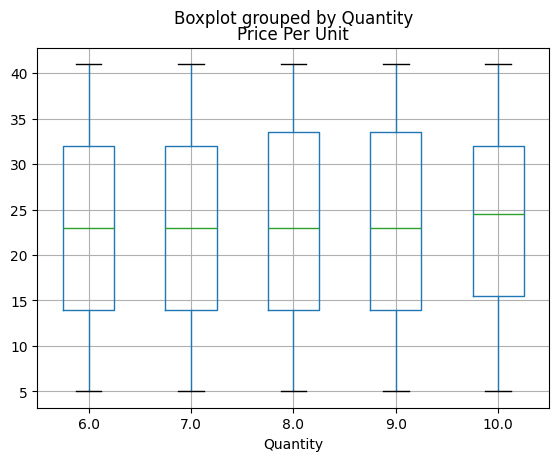

In [39]:
df_filtered.boxplot(by = 'Quantity', column = ['Price Per Unit'], grid = 'False')

The box column suggests that the price per unit generally ranges from ~15 to ~33 with the median of each group being in the low 20s (22-25 to be precise). We can also see that there are no outliers present in the price column of this dataset. Knowing how this column is distributed is important because from the boxplot we can see that there is no notable relationships between the Price per Unit and the Quantity in these observations. This means that there is no need for further testing to verify any statistical significance for these relationships. 

Before moving on, let us first see if there is a correlation between the two variables using the Pearson Correlation method. We choose this method because we want to see if a linear relationship is present between these two variables.

In [40]:
df_filtered['Quantity'].corr(df_filtered['Price Per Unit'])

np.float64(0.01598144593228284)

The value of 0.01598 (when rounded to 4 decimal places) is very close to 0. This is enough to safely conclude that there is no correlative relationship between prices per unit and the quantity of each purchase. To conclude this EDA, there is no correlation nor any potentially meaningful relationships.

### Question 2: Is there a relationship between the Quantity of Items and the Total Spent per purchase?

The next variable we will analyze for relationships is the Total Amount Spent. The Total Spent column is comprised of continuous numerical data that indicates the total amount of money that was spent in the transaction, after taking discounts into account. Given the fact that the Total Amount column is similar to the Price per Unit column in terms of data type, we will use the same method to analyze for any possible relationships. First, we will look at the boxplot to investigate if there are any possibly meaningful distributions among the the Total Amount observations per Quantity of Item value


<Axes: title={'center': 'Total Spent'}, xlabel='Quantity'>

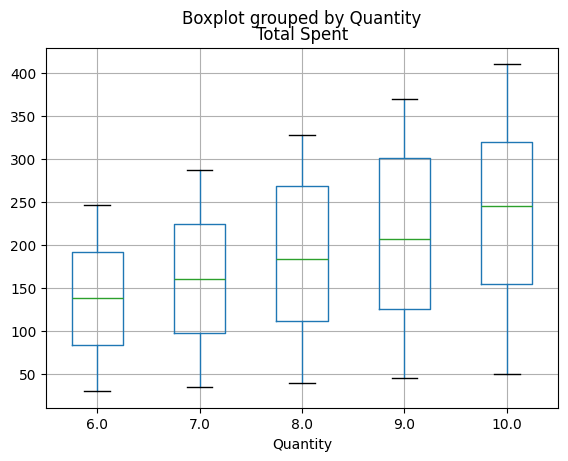

In [41]:
df_filtered.boxplot(by = 'Quantity', column = ['Total Spent'], grid = 'False')

Here, there is a potentially interesting relationship. As the quantity of items increases, several values grow larger. First is the median which is at its lowest when purchases are at 6 and at their peak when purchases are at 10. Similarly, both upper and lower quartiles, and the upper whisker increase by a noteable amount as the Quantity value increases. After EDA, we can test if these differences are meaningfully significant in various ways. The first is by performing an anova to see if any one group has a statistically significant difference in its mean compared to the other groups. Another way is to perform an unpaired t-test for every group combination if we want to identify which group has a statistically significant difference, if one is present.

Finally, let us use Pearson Correlation if there is a direct correlation between the Quantity of Items and the Total Spent variables.

In [42]:
df_filtered['Quantity'].corr(df_filtered['Total Spent'])

np.float64(0.372765050555415)

A value of 0.3729 is much closer to 1 compared to the Pearson coefficient that was given by testing the Price per Unit and Quantity. This means that there is a higher chance that there is an actual correlation between these two values. However, since the value is still quite far from 1, that chance is still quite small. However, further testing is still warranted for the statistical significance of the previous relationships that were noted.

### Question 3: Is there a relationship between the Quantity Purchased and whether or not a discount was applied to the purchase?

Now that we have tested for 2 numerical columns within this dataset, let us now try to see if there is a strong relationship between the Quantity Purchased and the Discount Applied variables. The process in examining this will be slightly different as the Discount Applied variable is categorical, not numeric. To begin with, let us understand the distribution of Discount Applied by looking at the mode, since median and mean cannot be calculated.

In [43]:
print(df_filtered['Discount Applied'].mode())

0    True
Name: Discount Applied, dtype: boolean


We can see that a majority of the orders with an above average quantity have some sort of discount applied. Fianlly, to get an idea of the difference let us use a bar chart. Using a bar chart in this instance is best because we are interested in the number of observations per category: discount applied, and no discount applied.

<Axes: xlabel='Discount Applied'>

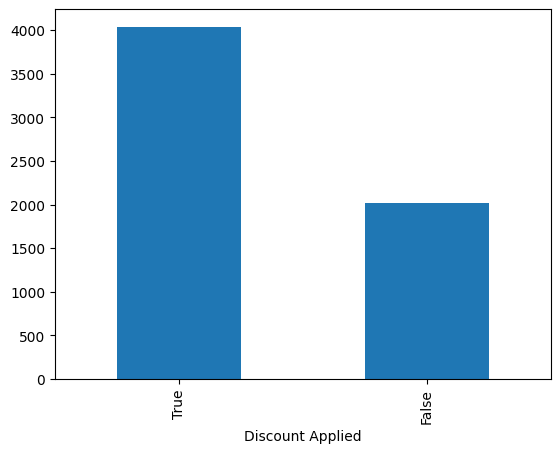

In [47]:
df_filtered['Discount Applied'].value_counts().plot.bar()

Here, we can see a difference of almost 2000 purchases. We can do further testing to see if this difference is statistically significant. This is done via a test of goodness using the chi-square test. By assuming that the expected value is 50/50, we can see if this difference actually means something or if it is inisignificant.